In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# check on the format of the train/test matrices and outputs
print(f'Format of X_train: {X_train.shape}\n')
print(f'Format of X_test: {X_test.shape}\n')
print(f'Format of y_train: {y_train.shape}\n')
print(f'Format of y_test: {y_test.shape}\n')
print(f'First elements of y_train: {y_train[:10].T}\n')
print(f'Min-max values of X_train: {np.min(X_train),np.max(X_train)}\n')

Format of X_train: (50000, 32, 32, 3)

Format of X_test: (10000, 32, 32, 3)

Format of y_train: (50000, 1)

Format of y_test: (10000, 1)

First elements of y_train: [[6 9 9 4 1 1 2 7 8 3]]

Min-max values of X_train: (0, 255)



In [4]:
num_classes = 10
input_shape = (32, 32, 3)

In [5]:
# normalize inputs
X_train_norm = X_train.astype(np.float32) / 255
X_test_norm = X_test.astype(np.float32) / 255
print(f'Min-max values of X_train: {np.min(X_train_norm),np.max(X_train_norm)}\n')

Min-max values of X_train: (0.0, 1.0)



In [6]:
# convert outputs to one-hot encodings
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# train/val split
X_train_norm1, X_val, y_train_onehot1, y_val = train_test_split(
    X_train_norm, y_train_onehot,
    test_size=0.2,
    random_state=42)
print(f'Format of X_train_norm1: {X_train_norm1.shape}\n')
print(f'Format of X_val: {X_val.shape}\n')
print(f'Format of y_train_onehot1: {y_train_onehot1.shape}\n')
print(f'Format of y_val: {y_val.shape}\n')

In [56]:
model1 = keras.Sequential([
    keras.Input(input_shape),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(num_classes, activation='softmax'),
])
model1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 8, 8, 64)        

In [57]:
# hyperparameters
batch_size = 128
epochs = 200
opt = keras.optimizers.Adam(lr=0.001,
                            beta_1=0.9,
                            beta_2=0.999,
                            epsilon=1e-08,
                            decay=0.0)

# compile model
model1.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics = ['accuracy'])

# file path and log
modelname = 'v001'
logdir = './log/' + modelname
modeldir = './chkpt/' +  modelname

os.makedirs(modeldir, exist_ok=True)
os.makedirs(logdir, exist_ok=True)

filepath = modeldir + '/epoch_{epoch:02d}-acc_{accuracy:.4f}-val_acc_{val_accuracy:.4f}.hdf5'

# callbacks list
callbacks_list = [
#    EarlyStopping(
#        monitor='val_accuracy',
#        patience=10,
#        ),
    ModelCheckpoint(
        filepath=filepath,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1,
        ),
    TensorBoard(
        log_dir=logdir,
        )
    ]

2022-09-14 20:06:15.572267: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-09-14 20:06:15.572280: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-09-14 20:06:15.572321: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-09-14 20:06:15.572331: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/200
 25/313 [=>............................] - ETA: 2s - loss: 2.2944 - accuracy: 0.0956

2022-09-14 20:06:41.905482: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-09-14 20:06:41.905499: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-09-14 20:06:41.905564: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-09-14 20:06:41.933872: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-09-14 20:06:41.934844: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-09-14 20:06:41.935351: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-09-14 20:06:41.935968: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./log/v001/train/plugins/profile/2022_09_14_20_06_

313/313 [==============================] - 4s 11ms/step - loss: 2.0650 - accuracy: 0.2067 - val_loss: 1.5438 - val_accuracy: 0.4273

Epoch 00001: val_accuracy improved from -inf to 0.42730, saving model to ./chkpt/v001/epoch_01-acc_0.2831-val_acc_0.4273.hdf5
Epoch 2/200
313/313 [==============================] - 2s 8ms/step - loss: 1.5684 - accuracy: 0.4179 - val_loss: 1.3977 - val_accuracy: 0.4818

Epoch 00002: val_accuracy improved from 0.42730 to 0.48180, saving model to ./chkpt/v001/epoch_02-acc_0.4378-val_acc_0.4818.hdf5
Epoch 3/200
313/313 [==============================] - 2s 7ms/step - loss: 1.4032 - accuracy: 0.4872 - val_loss: 1.2450 - val_accuracy: 0.5470

Epoch 00003: val_accuracy improved from 0.48180 to 0.54700, saving model to ./chkpt/v001/epoch_03-acc_0.5023-val_acc_0.5470.hdf5
Epoch 4/200
313/313 [==============================] - 3s 8ms/step - loss: 1.2860 - accuracy: 0.5373 - val_loss: 1.1440 - val_accuracy: 0.5965

Epoch 00004: val_accuracy improved from 0.54700 to 

313/313 [==============================] - 4s 11ms/step - loss: 0.6884 - accuracy: 0.7553 - val_loss: 0.7359 - val_accuracy: 0.7477

Epoch 00035: val_accuracy did not improve from 0.75250
Epoch 36/200
313/313 [==============================] - 4s 11ms/step - loss: 0.6952 - accuracy: 0.7610 - val_loss: 0.7219 - val_accuracy: 0.7518

Epoch 00036: val_accuracy did not improve from 0.75250
Epoch 37/200
313/313 [==============================] - 4s 12ms/step - loss: 0.6873 - accuracy: 0.7590 - val_loss: 0.7274 - val_accuracy: 0.7548

Epoch 00037: val_accuracy improved from 0.75250 to 0.75480, saving model to ./chkpt/v001/epoch_37-acc_0.7560-val_acc_0.7548.hdf5
Epoch 38/200
313/313 [==============================] - 2s 7ms/step - loss: 0.6941 - accuracy: 0.7589 - val_loss: 0.7025 - val_accuracy: 0.7574

Epoch 00038: val_accuracy improved from 0.75480 to 0.75740, saving model to ./chkpt/v001/epoch_38-acc_0.7573-val_acc_0.7574.hdf5
Epoch 39/200
313/313 [==============================] - 2s 7ms

313/313 [==============================] - 2s 7ms/step - loss: 0.5978 - accuracy: 0.7902 - val_loss: 0.6932 - val_accuracy: 0.7614

Epoch 00073: val_accuracy did not improve from 0.77790
Epoch 74/200
313/313 [==============================] - 4s 12ms/step - loss: 0.5845 - accuracy: 0.7954 - val_loss: 0.6917 - val_accuracy: 0.7676

Epoch 00074: val_accuracy did not improve from 0.77790
Epoch 75/200
313/313 [==============================] - 4s 11ms/step - loss: 0.5922 - accuracy: 0.7916 - val_loss: 0.6766 - val_accuracy: 0.7732

Epoch 00075: val_accuracy did not improve from 0.77790
Epoch 76/200
313/313 [==============================] - 4s 12ms/step - loss: 0.5857 - accuracy: 0.7955 - val_loss: 0.6683 - val_accuracy: 0.7734

Epoch 00076: val_accuracy did not improve from 0.77790
Epoch 77/200
313/313 [==============================] - 3s 10ms/step - loss: 0.5874 - accuracy: 0.7960 - val_loss: 0.6977 - val_accuracy: 0.7721

Epoch 00077: val_accuracy did not improve from 0.77790
Epoch 78/

313/313 [==============================] - 4s 11ms/step - loss: 0.5350 - accuracy: 0.8101 - val_loss: 0.6785 - val_accuracy: 0.7758

Epoch 00113: val_accuracy did not improve from 0.78190
Epoch 114/200
313/313 [==============================] - 3s 11ms/step - loss: 0.5423 - accuracy: 0.8106 - val_loss: 0.7003 - val_accuracy: 0.7713

Epoch 00114: val_accuracy did not improve from 0.78190
Epoch 115/200
313/313 [==============================] - 4s 11ms/step - loss: 0.5423 - accuracy: 0.8102 - val_loss: 0.6828 - val_accuracy: 0.7741

Epoch 00115: val_accuracy did not improve from 0.78190
Epoch 116/200
313/313 [==============================] - 4s 11ms/step - loss: 0.5252 - accuracy: 0.8176 - val_loss: 0.7283 - val_accuracy: 0.7597

Epoch 00116: val_accuracy did not improve from 0.78190
Epoch 117/200
313/313 [==============================] - 3s 10ms/step - loss: 0.5311 - accuracy: 0.8140 - val_loss: 0.6974 - val_accuracy: 0.7719

Epoch 00117: val_accuracy did not improve from 0.78190
Epoc

313/313 [==============================] - 3s 10ms/step - loss: 0.5017 - accuracy: 0.8264 - val_loss: 0.7307 - val_accuracy: 0.7637

Epoch 00153: val_accuracy did not improve from 0.78410
Epoch 154/200
313/313 [==============================] - 3s 11ms/step - loss: 0.5175 - accuracy: 0.8256 - val_loss: 0.6744 - val_accuracy: 0.7771

Epoch 00154: val_accuracy did not improve from 0.78410
Epoch 155/200
313/313 [==============================] - 4s 11ms/step - loss: 0.4907 - accuracy: 0.8338 - val_loss: 0.7147 - val_accuracy: 0.7679

Epoch 00155: val_accuracy did not improve from 0.78410
Epoch 156/200
313/313 [==============================] - 4s 12ms/step - loss: 0.4979 - accuracy: 0.8268 - val_loss: 0.6693 - val_accuracy: 0.7812

Epoch 00156: val_accuracy did not improve from 0.78410
Epoch 157/200
313/313 [==============================] - 3s 11ms/step - loss: 0.4839 - accuracy: 0.8336 - val_loss: 0.6701 - val_accuracy: 0.7846

Epoch 00157: val_accuracy improved from 0.78410 to 0.78460,


Epoch 00192: val_accuracy did not improve from 0.78690
Epoch 193/200
313/313 [==============================] - 4s 11ms/step - loss: 0.4782 - accuracy: 0.8354 - val_loss: 0.6909 - val_accuracy: 0.7803

Epoch 00193: val_accuracy did not improve from 0.78690
Epoch 194/200
313/313 [==============================] - 4s 11ms/step - loss: 0.4877 - accuracy: 0.8331 - val_loss: 0.6879 - val_accuracy: 0.7800

Epoch 00194: val_accuracy did not improve from 0.78690
Epoch 195/200
313/313 [==============================] - 4s 11ms/step - loss: 0.4803 - accuracy: 0.8349 - val_loss: 0.7004 - val_accuracy: 0.7740

Epoch 00195: val_accuracy did not improve from 0.78690
Epoch 196/200
313/313 [==============================] - 4s 11ms/step - loss: 0.4819 - accuracy: 0.8357 - val_loss: 0.6705 - val_accuracy: 0.7815

Epoch 00196: val_accuracy did not improve from 0.78690
Epoch 197/200
313/313 [==============================] - 4s 11ms/step - loss: 0.4848 - accuracy: 0.8345 - val_loss: 0.6957 - val_accurac

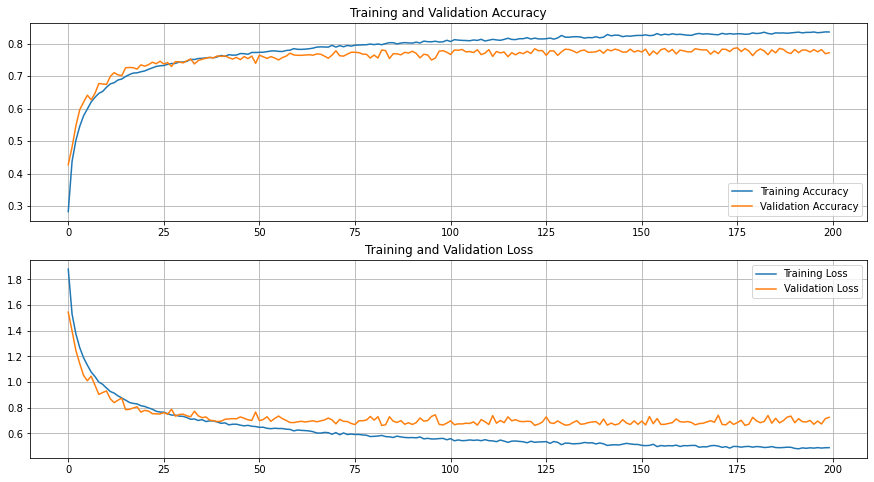

In [58]:
# training
history = model1.fit(
    X_train_norm1,
    y_train_onehot1,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val,y_val),
    callbacks=callbacks_list
)

# verify training performance
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.grid(True)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.grid(True)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
